In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
wine=pd.read_csv("C:\\Users\\PRATIK\\Downloads\\wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
#considering only numerical data
wine_data = wine.iloc[:,1:]
wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#converting into numpy array
WINE=wine_data.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
wine_normal = scale(WINE)

In [8]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
pca=PCA()
pca_values = pca.fit_transform(wine_normal)

In [10]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [12]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine_normal)

In [13]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [14]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [15]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53])

In [16]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

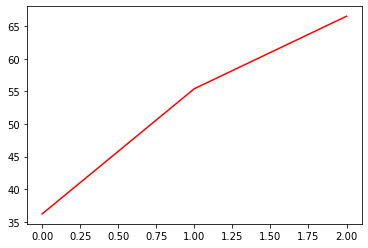

In [17]:
plt.plot(var1,color="red")

In [18]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

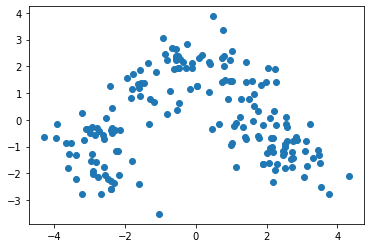

In [19]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [23]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns = ['pc1','pc2']), wine[['Type']]],axis=1)

In [24]:
finalDf

,pc1,pc2,Type
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

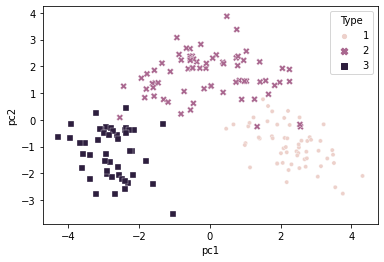

In [25]:
import seaborn as sns
sns.scatterplot(data= finalDf,x='pc1',y='pc2',hue='Type',style='Type',size='Type')

In [ ]:
#Hierarchy technique


In [26]:
import pandas as pd
wine=pd.read_csv("C:\\Users\\PRATIK\\Downloads\\wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [27]:
#importing hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [28]:
#normalization function
def minmax_func(i):
    x = (i-i.min()/(i.max()-i.min()))
    return (x)

In [64]:
df_norm = minmax_func(wine.iloc[:,1:4])

In [67]:
df_norm

,Alcohol,Malic,Ash
0,11.327368,1.563755,1.702727
1,10.297368,1.633755,1.412727
2,10.257368,2.213755,1.942727
3,11.467368,1.803755,1.772727
4,10.337368,2.443755,2.142727
...,...,...,...
173,10.807368,5.503755,1.722727
174,10.497368,3.763755,1.752727
175,10.367368,4.133755,1.532727
176,10.267368,2.443755,1.642727


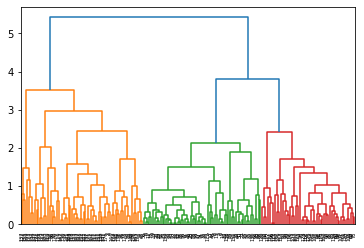

In [68]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='complete'))
#mothods: 'single', 'complete','centroid'

In [69]:
#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [70]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [71]:
#save clusters for charts
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [72]:
Clusters.value_counts()

Clusters
0           65
2           63
1           50
dtype: int64

In [73]:
y_hc

array([2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0], dtype=int64)

In [75]:
wine['h_clustered']=y_hc

In [77]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clustered
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [78]:
df_norm


,Alcohol,Malic,Ash
0,11.327368,1.563755,1.702727
1,10.297368,1.633755,1.412727
2,10.257368,2.213755,1.942727
3,11.467368,1.803755,1.772727
4,10.337368,2.443755,2.142727
...,...,...,...
173,10.807368,5.503755,1.722727
174,10.497368,3.763755,1.752727
175,10.367368,4.133755,1.532727
176,10.267368,2.443755,1.642727


In [ ]:
#Kmeans Clustering

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [84]:
wine=pd.read_csv("C:\\Users\\PRATIK\\Downloads\\wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [100]:
#def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

IndentationError: unexpected indent (<ipython-input-100-0adf776c9c90>, line 2)

In [101]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [102]:
x=norm_func(wine.iloc[:,1:4])
x

,Alcohol,Malic,Ash
0,1.514341,-0.560668,0.231400
1,0.245597,-0.498009,-0.825667
2,0.196325,0.021172,1.106214
3,1.686791,-0.345835,0.486554
4,0.294868,0.227053,1.835226
...,...,...,...
173,0.873810,2.966176,0.304301
174,0.491955,1.408636,0.413653
175,0.331822,1.739837,-0.388260
176,0.208643,0.227053,0.012696


In [103]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine.iloc[:,1:4])

In [104]:
scaled_wine_df

array([[ 1.51861254, -0.5622498 ,  0.23205254],
       [ 0.24628963, -0.49941338, -0.82799632],
       [ 0.19687903,  0.02123125,  1.10933436],
       [ 1.69154964, -0.34681064,  0.4879264 ],
       [ 0.29570023,  0.22769377,  1.84040254],
       [ 1.48155459, -0.51736664,  0.30515936],
       [ 1.71625494, -0.4186237 ,  0.30515936],
       [ 1.3086175 , -0.16727801,  0.89001391],
       [ 2.25977152, -0.62508622, -0.7183361 ],
       [ 1.0615645 , -0.88540853, -0.352802  ],
       [ 1.3580281 , -0.15830138, -0.24314178],
       [ 1.38273339, -0.76871232, -0.17003496],
       [ 0.92568536, -0.54429654,  0.15894572],
       [ 2.16095032, -0.54429654,  0.0858389 ],
       [ 1.70390229, -0.4186237 ,  0.0492855 ],
       [ 0.77745356, -0.47248348,  1.21899459],
       [ 1.60508109, -0.37374054,  1.29210141],
       [ 1.02450655, -0.68792264,  0.92656731],
       [ 1.46920194, -0.66996938,  0.41481959],
       [ 0.78980621,  0.68550197,  0.70724686],
       [ 1.3086175 , -0.63406285, -0.316

C:\Users\PRATIK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


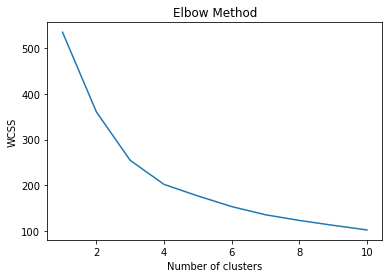

In [136]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_wine_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_wine_df)

KMeans(n_clusters=3, random_state=42)

In [117]:
clusters_new.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2,
       1, 2])

In [118]:
#Assign clusters to the data set
wine['clusterid_new'] = clusters_new.labels_

In [119]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [120]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.86738997, -0.56763578, -0.63896298],
       [ 0.89398022, -0.45348295,  0.54214729],
       [ 0.14746843,  1.39465586,  0.25413689]])

In [121]:
wine.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.028571,12.298429,1.704000,2.191714,19.278571,94.685714,2.178143,1.940143,0.358000,1.583429,3.492571,1.031514,2.662571,566.942857
1,1,1.350000,13.724333,1.831167,2.514833,18.631667,106.166667,2.736167,2.725833,0.320500,1.840500,6.045833,1.026667,2.957000,1043.900000
2,2,2.541667,13.120000,3.890000,2.436042,20.889583,99.083333,1.914375,1.288542,0.419167,1.289792,6.106458,0.762917,2.105833,638.062500


In [122]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [129]:
wine['clusterid_new']=wine['clusterid_new'].replace(0,'cluster 1')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,cluster 1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [130]:
wine['clusterid_new']=wine['clusterid_new'].replace(1,'cluster 2')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,cluster 2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,cluster 1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,cluster 2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,cluster 2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,cluster 2


In [131]:
wine['clusterid_new']=wine['clusterid_new'].replace(2,'cluster 3')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,cluster 2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,cluster 1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,cluster 2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,cluster 2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,cluster 3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,cluster 3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,cluster 3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,cluster 2


In [132]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'clusterid_new'],
      dtype='object')

In [133]:
wine['clusterid_new'].value_counts()

cluster 1    70
cluster 2    60
cluster 3    48
Name: clusterid_new, dtype: int64